In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools as it
import warnings

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from pyearth import Earth

In [50]:
warnings.filterwarnings("ignore")

In [149]:
train = pd.read_csv('data/train.csv')
train.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5


In [150]:
test = pd.read_csv('data/test.csv')
test.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,5380,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,...,0.0380,0.0010,90204869909,0.26,8.0,5,5.0,30.1213,27.95,-0.49
1,5381,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,...,0.1866,0.0192,37449565014,0.02,16.0,1,8.0,2.1282,10.18,0.55
2,5382,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,...,0.0100,0.0017,10847937619,0.83,35.0,1,19.0,7.8513,21.27,19.09
3,5383,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,...,0.4636,0.0000,37200096,0.51,1.0,4,0.0,9.0511,18.38,4.11
4,5384,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,...,2.8737,0.0001,16400000000000,0.12,2.0,1,2.0,2.6512,149.68,0.02


In [151]:
train = train.fillna(0)

5380


In [152]:
y_train = train['y']
X_train = train.drop(['y', 'id'], axis = 1)

In [153]:
corr = abs(train.corrwith(train['y']))
top_20 = corr.sort_values(ascending = False).head(21)[1:]
print(top_20)

x146    0.378696
x102    0.378436
x014    0.364737
x581    0.346598
x619    0.344101
x687    0.343842
x651    0.329630
x696    0.329630
x755    0.324916
x096    0.315185
x756    0.312320
x569    0.311497
x543    0.308728
x749    0.296195
x591    0.293075
x427    0.293073
x742    0.282411
x561    0.279915
x488    0.275807
x670    0.272551
dtype: float64


<AxesSubplot:>

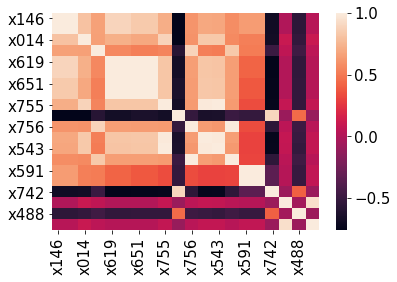

In [154]:
sns.heatmap(X_train[['x146', 'x102', 'x014', 'x581', 'x619', 'x687', 'x651', 'x696', 'x755', 'x096', 'x756',
                    'x569', 'x543', 'x749', 'x591', 'x427', 'x742', 'x561', 'x488', 'x670']].corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x19ed09aa970>,
 'caps': [<matplotlib.lines.Line2D at 0x19ed09b4070>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ed09aa610>],
 'medians': [<matplotlib.lines.Line2D at 0x19ed09b4730>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ed09b4a90>],
 'means': []}

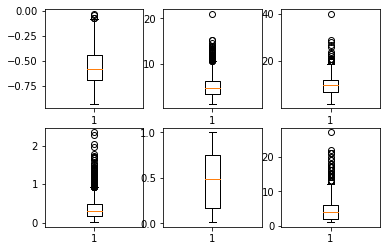

In [9]:
plt.subplot(2, 3, 1)
plt.boxplot(X_train['x102'])

plt.subplot(2, 3, 2)
plt.boxplot(X_train['x014'])

plt.subplot(2, 3, 3)
plt.boxplot(X_train['x118'])

plt.subplot(2, 3, 4)
plt.boxplot(X_train['x581'])

plt.subplot(2, 3, 5)
plt.boxplot(X_train['x096'])

plt.subplot(2, 3, 6)
plt.boxplot(X_train['x569'])

C:\Users\subwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x702'>

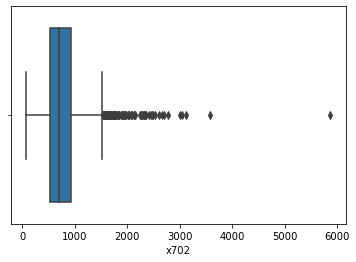

In [10]:
sns.boxplot(X_train['x702'])

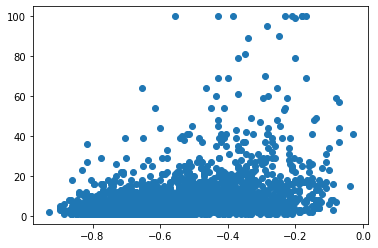

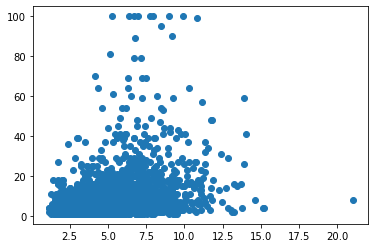

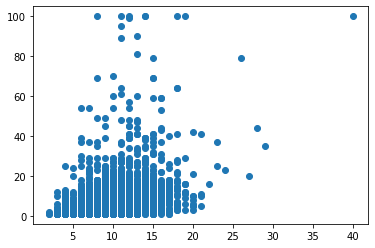

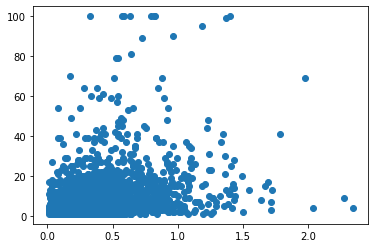

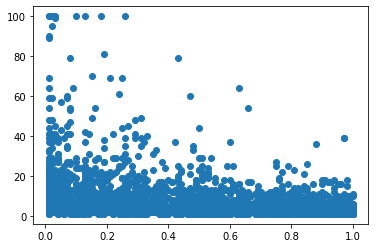

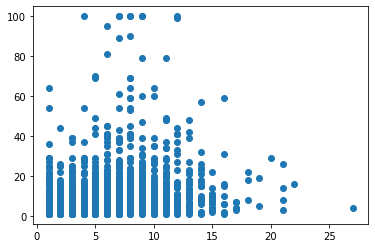

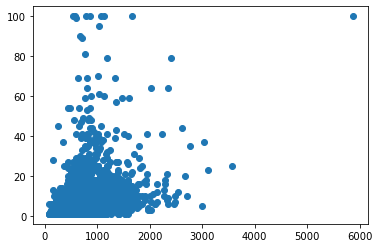

In [11]:
for i in range(7):
    plt.scatter(x = X_train.iloc[:, i], y = y_train)
    plt.show()

In [127]:
X_test = test
col_id = test['id']
X_test = test.drop(['id'], axis = 1)
X_test = X_test[['x102', 'x014', 'x118', 'x581', 'x096', 'x569', 'x702']]
X_test = X_test.fillna(0)

## MARS

In [155]:
model_MARS = Earth(max_terms = 400, max_degree = 4).fit(X_train, y_train)

KeyboardInterrupt: 

## AdaBoost

In [156]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    for n in n_trees:
        models[str(n)] = AdaBoostRegressor(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

KeyboardInterrupt: 

>1 11.496 (1.447)
>2 10.532 (1.595)
>3 10.964 (1.969)
>4 12.304 (1.305)
>5 11.175 (1.304)
>6 10.238 (1.612)
>7 9.633 (1.756)
>8 9.343 (1.795)
>9 9.264 (1.954)
>10 9.240 (1.972)
>11 9.271 (1.956)
>12 9.221 (1.998)
>13 9.451 (2.013)
>14 9.375 (2.054)
>15 9.420 (2.059)
>16 9.459 (2.171)
>17 9.448 (2.062)
>18 9.328 (1.996)
>19 9.395 (2.091)
>20 9.562 (1.992)


Text(0.5, 0, 'Depth of each tree')

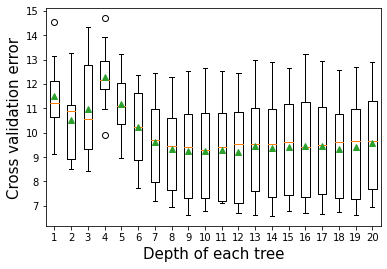

In [19]:
def get_models():
    models = dict()
    # explore depths for a range
    for i in range(1,21):
        base = DecisionTreeRegressor(max_depth=i)
        models[str(i)] = AdaBoostRegressor(base_estimator=base,n_estimators=50)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot    
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

In [28]:
model = AdaBoostRegressor(random_state=1)
grid = dict()
grid['n_estimators'] = [2, 3, 4]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['base_estimator'] = [DecisionTreeRegressor(max_depth=9), DecisionTreeRegressor(max_depth=10), 
                          DecisionTreeRegressor(max_depth=11), DecisionTreeRegressor(max_depth=12)]

cv = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: -94.904340 using {'base_estimator': DecisionTreeRegressor(max_depth=10), 'learning_rate': 0.0001, 'n_estimators': 3}


In [30]:
model_ADA = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),n_estimators=3,learning_rate=0.0001,
                              random_state=1).fit(X_train, y_train)

## Random Forest

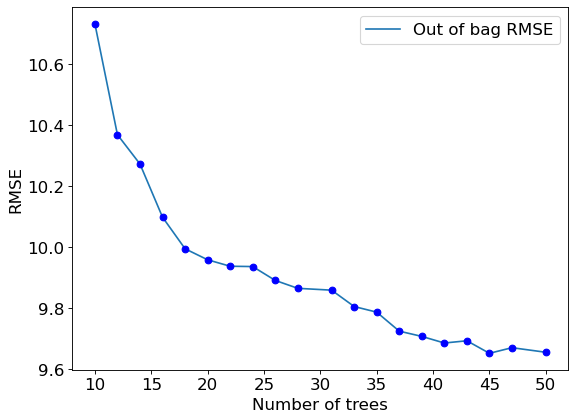

In [52]:
oob_rsquared={};test_rsquared={};oob_rmse={};test_rmse = {}
for i in np.linspace(10,50,20,dtype=int):
    model = RandomForestRegressor(n_estimators=i, random_state=1,max_features="sqrt",
                        n_jobs=-1,oob_score=True).fit(X_train, y_train)
    oob_rsquared[i]=model.oob_score_  
    oob_rmse[i]=np.sqrt(mean_squared_error(model.oob_prediction_,y_train))
    
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(oob_rmse.keys(),oob_rmse.values(),label = 'Out of bag RMSE')
plt.plot(oob_rmse.keys(),oob_rmse.values(),'o',color = 'blue')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.legend()

In [59]:
#Tuning only n_estimators and max_features produces similar results
params = {'n_estimators': [12, 13, 14, 15, 16],
          'max_features': [2, 3, 4, 5]}
param_list=list(it.product(*(params[Name] for Name in params)))
oob_score = [0]*len(param_list)
i=0
for pr in param_list:
    model = RandomForestRegressor(random_state=1,oob_score=True,verbose=False,n_estimators = pr[0],
                                 max_features=pr[1],n_jobs=-1).fit(X_train, y_train)
    oob_score[i] = model.oob_score_
    i=i+1
    
print("Best params = ", param_list[np.argmax(oob_score)])
print("Best score (R-squared) = ", np.max(oob_score))

Best params =  (15, 4)
Best score (R-squared) =  0.10998652337911308


In [60]:
model_RF = RandomForestRegressor(n_estimators=15, max_features=4, random_state=1, n_jobs=-1).fit(X_train, y_train)

## XGBoost

>3 9.776 (1.081)
>4 9.565 (1.064)
>5 9.441 (1.013)
>6 9.469 (1.026)
>7 9.523 (1.024)
>8 9.574 (1.042)


Text(0.5, 0, 'Number of trees')

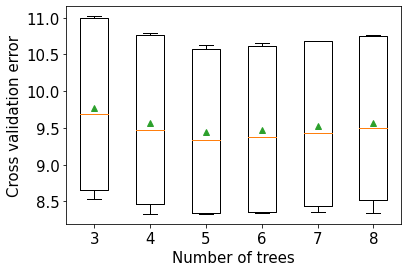

In [76]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [3, 4, 5, 6, 7, 8]
    for n in n_trees:
        models[str(n)] = xgb.XGBRegressor(n_estimators=n,random_state=1)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

>1 9.009 (1.800)
>2 9.324 (1.751)
>3 9.790 (1.741)
>4 10.032 (1.870)
>5 10.157 (1.949)
>6 10.017 (1.715)
>7 10.275 (1.723)
>8 10.145 (1.925)
>9 10.230 (1.799)
>10 10.371 (1.926)


Text(0.5, 0, 'Depth of each tree')

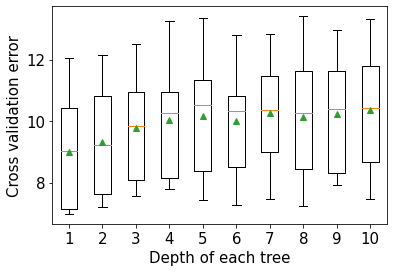

In [78]:
def get_models():
    models = dict()
    for i in range(1,11):
        models[str(i)] = xgb.XGBRegressor(random_state=1,max_depth=i)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

>0.0100 9.6 (2.1)
>0.0150 9.3 (2.1)
>0.0200 9.2 (2.1)
>0.0250 9.2 (2.0)
>0.0300 9.2 (2.0)
>0.0350 9.3 (2.0)
>0.0400 9.3 (1.9)


Text(0.5, 0, 'Learning rate')

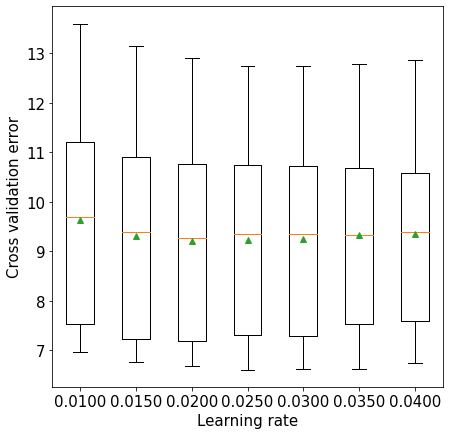

In [84]:
def get_models():
    models = dict()
    for i in [0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(learning_rate=i,random_state=1)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
    
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Learning rate',fontsize=15)

>1.0000 10.0 (1.7)
>10.0000 10.0 (1.9)
>50.0000 9.9 (1.8)
>100.0000 9.7 (1.8)


Text(0.5, 0, 'reg_lambda')

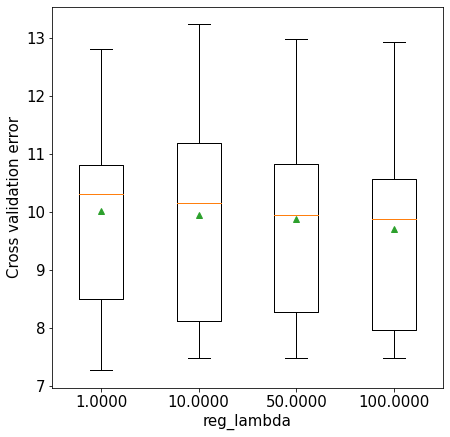

In [102]:
def get_models():
    models = dict()
    for i in [1, 10, 50, 100]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(reg_lambda=i,random_state=1)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))

plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('reg_lambda',fontsize=15)

In [109]:
param_grid = {'n_estimators':[5, 6],
              'max_depth': [2, 3, 4, 5],
              'learning_rate': [0.225, 0.250, 0.275, 0.300],
              'reg_lambda':[8, 9, 10, 11]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1),                                                       
                             param_grid = param_grid,                             
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv)
optimal_params.fit(X_train , y_train)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation R-squared = ",optimal_params.best_score_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Optimal parameter values = {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 6, 'reg_lambda': 9}
Optimal cross validation R-squared =  0.22304966553525518


In [110]:
model_XG = xgb.XGBRegressor(random_state=1, max_depth=3, n_estimators=6, learning_rate = 0.3, reg_lambda=9).fit(X_train, y_train)

## MARS Ensemble

In [114]:
model_ensemble= StackingRegressor(estimators = [('ADA', model_ADA),
                                                ('RF', model_RF),
                                                ('MARS', model_MARS),
                                                ('XG', model_XG)],
                      final_estimator=RandomForestRegressor(n_estimators = 4, random_state = 1),
                      cv = KFold(n_splits = 5, shuffle = True, random_state=1))
model_ensemble.fit(X_train, y_train)

StackingRegressor(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                  estimators=[('ADA',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                                                 learning_rate=0.0001,
                                                 n_estimators=3,
                                                 random_state=1)),
                              ('RF',
                               RandomForestRegressor(max_features=4,
                                                     n_estimators=15, n_jobs=-1,
                                                     random_state=1)),
                              ('MARS', Earth(max_degree=4, max_terms=400)),
                              ('XG',
                               XGBRegr...
                                            interaction_constraints='',
                                            learning_rate=0.3, max_bin=256,
                           

In [125]:
pred1 = model_ensemble.predict(X_test)

In [143]:
pred_v1 = pd.DataFrame(index=range(X_test.shape[0]), columns=range(2))
pred_v1.columns = ['id', 'y']
pred_v1['id'] = col_id
pred_v1['y'] = pred1
pred_v1

,id,y
0,5380,5.50
1,5381,8.00
2,5382,1.25
3,5383,6.00
4,5384,17.25
...,...,...
4398,9778,5.50
4399,9779,4.75
4400,9780,5.75
4401,9781,8.50


In [142]:
pred_v1.to_csv('pred_v1.csv', index=True)